In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(30,330)]
i =0
result = np.zeros((300,62))

In [3]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.SALT.nc')
        plotvar = data.variables['SALT'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        #lont = lont[250:344,1100:1300]
        #latt = latt[250:344,1100:1300]
        plotvar = plotvar[:,-1,1400]
        plotvar[plotvar == -1000.0] = np.nan
        #aveplot = np.nanmean(plotvar,axis=1)
        #aveplot = np.nanmean(aveplot,axis=1)
        #aveplot = plotvar.mean(axis=1)
        #aveplot = aveplot.mean(axis=1)
        result[i] = plotvar
        
        i = i + 1
#********************************************************************

In [4]:
nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([1,30,50,100,130,140,150,170,190,210,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
my_font = {'fontname':'Cambria', 'size':'17'}
#nice_levels = [-1.5,-1.2,-0.8,-0.4,0,0.4,0.8,1.2,1.5]
nice_levels = [34.64,34.645,34.65,34.655,34.66,34.665,34.67,34.675,34.68]
nice_levels = [34.65,34.66,34.67,34.68,34.69,34.70,34.71,34.72,34.73,34.74,34.75,34.76,34.77,34.78,34.79,34.8,34.81,34.82,34.83,34.84,34.85]

In [33]:
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/depth.nc')
C = data1.variables['z_t'][:]/100
B = C[:55]

In [34]:
A = np.arange(470)
#B = np.arange(50)
xx, yy = np.meshgrid(B, A)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The following kwargs were not used by contour: 'interpolation'
  


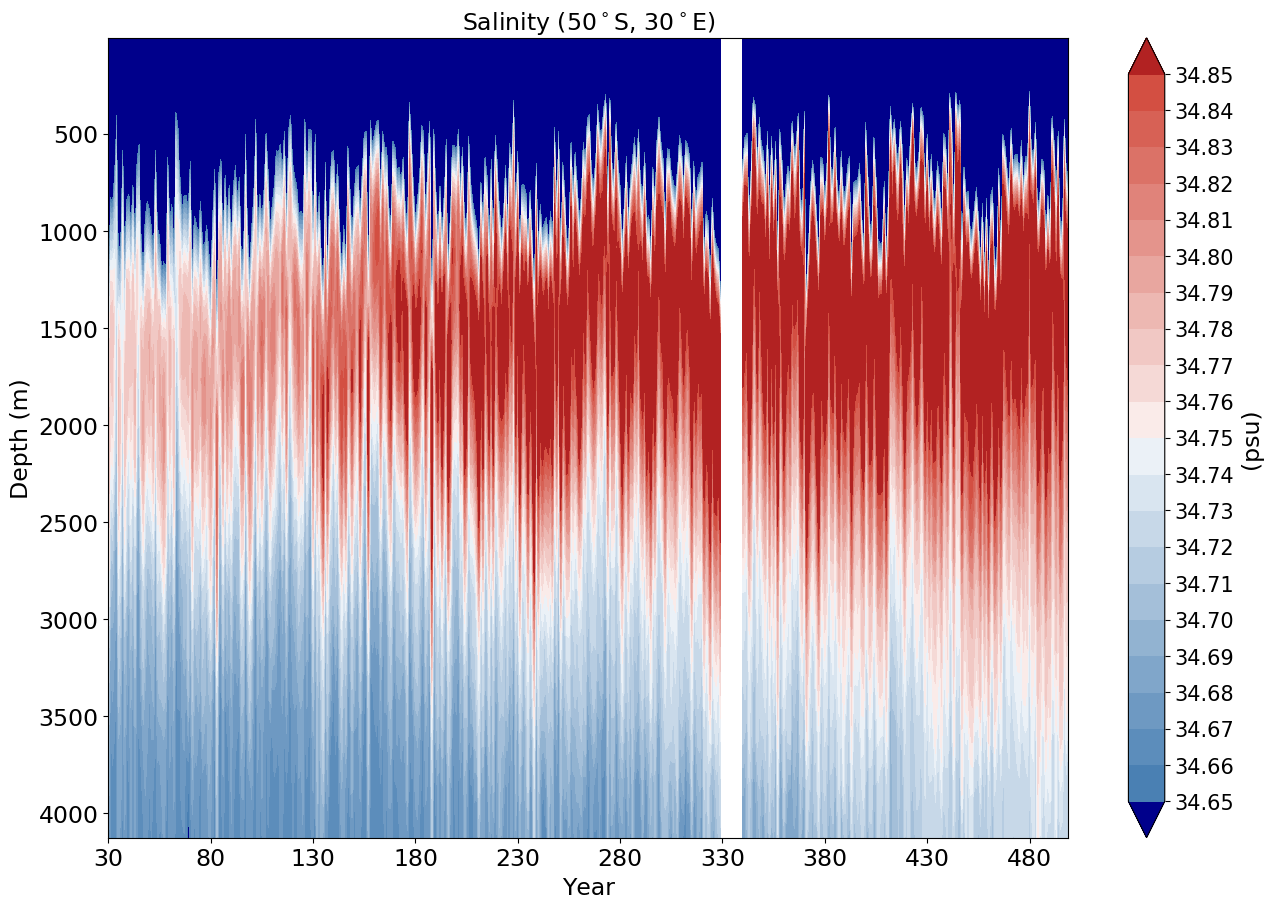

In [35]:
#t = np.arange(0,540,3)
# plot the result
fig = plt.figure(figsize=(15, 10), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
#ax0 = plt.subplot(2,1,1)
im = ax0.contourf(yy, xx, ddd[:,:55],levels = nice_levels,cmap=nice_cmap,interpolation='none',extend='both')
im.cmap.set_over('firebrick')
im.cmap.set_under('darkblue')
#CS = ax0.contour(yy,xx,result, [0.8],colors = 'r', linestyles = 'solid',linewidths=1)
#plt.clabel(CS, inline=0.1, fontsize=10)
cbar = fig.colorbar(im, ax=ax0, ticks=nice_levels,extendfrac='auto')
cbar.ax.tick_params(labelsize=15)
#cbar.minorticks_on()
cbar.set_label('(psu)', **my_font)
ax0.set_title('Mixed Layer Depth')
#############################################################################
##设定X坐标值
plt.xticks(range(0,470,50), ['30', '80', '130', '180', '230','280', '330', '380', '430', '480'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Year',**my_font)
plt.ylabel('Depth (m)',**my_font)
plt.gca().invert_yaxis()
ax0.set_title('Salinity (50$^\circ$S, 30$^\circ$E)',**my_font)
plt.savefig("s.png",bbox_inches='tight',dpi=fig.dpi)

In [8]:
np.save(file="d.npy", arr=result)

In [18]:
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(340,500)]
i =0
result1 = np.zeros((160,62))

In [19]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn330-500/cmpr_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.SALT.nc')
        plotvar = data.variables['SALT'][0,:,:]
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        #lont = lont[250:344,1100:1300]
        #latt = latt[250:344,1100:1300]
        plotvar = plotvar[:,-1,1400]
        plotvar[plotvar == -1000.0] = np.nan
        #aveplot = np.nanmean(plotvar,axis=1)
        #aveplot = np.nanmean(aveplot,axis=1)
        #aveplot = plotvar.mean(axis=1)
        #aveplot = aveplot.mean(axis=1)
        result1[i] = plotvar
        
        i = i + 1
#********************************************************************

In [20]:
mid = np.zeros((10,62))
mid[mid == 0]=np.nan

In [21]:
dd = np.vstack((result,mid))

In [22]:
ddd = np.vstack((dd,result1))

In [23]:
ddd.shape

(470, 62)

In [58]:
a = ddd[130:,40:45]

In [59]:
b = np.nanmean(a, axis=1)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [64]:
B[45]

1968.9442

In [61]:
temm = np.convolve(b, np.ones((5,))/5, mode='valid')

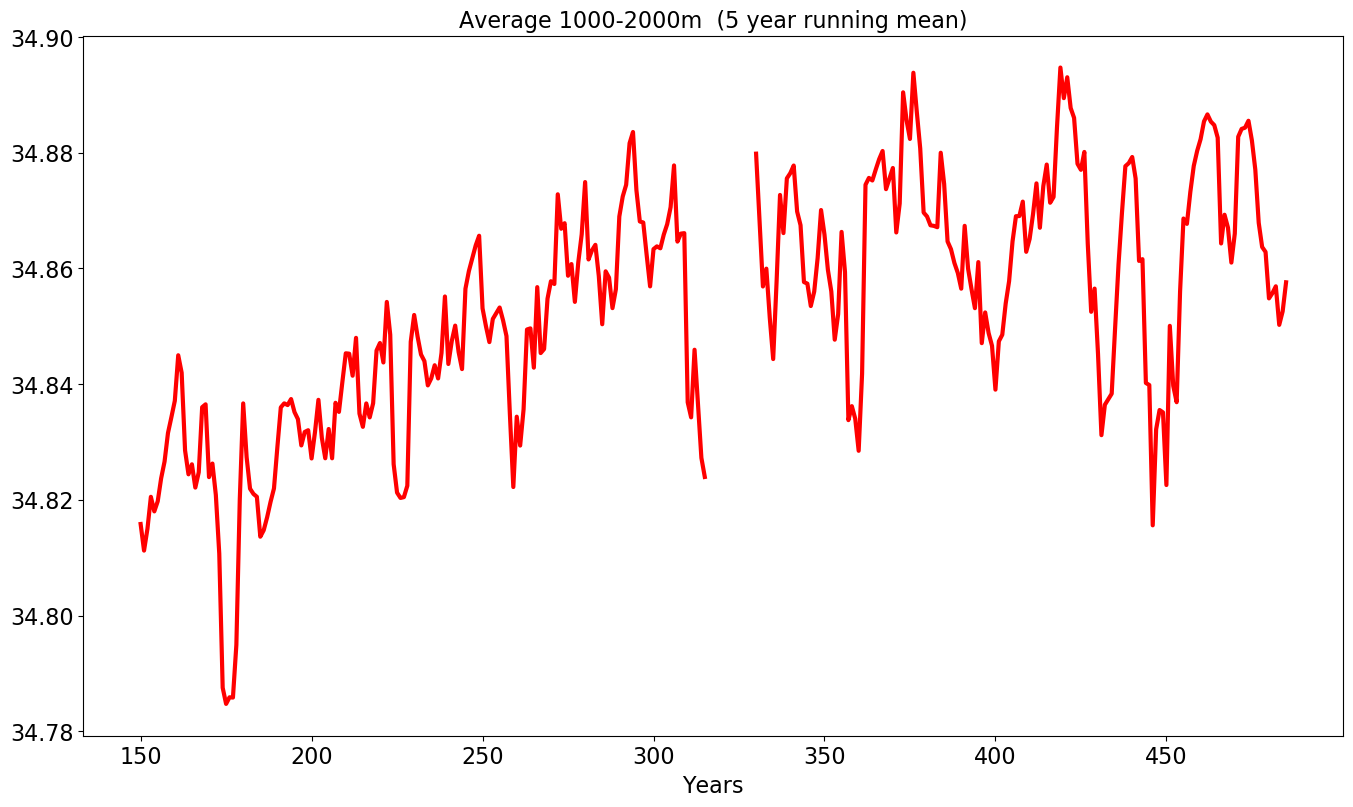

In [65]:
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(18,10), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(temm,'red',linewidth=3)
#########################################
#plt.xticks(range(0,351,50), ['150', '200', '250', '300', '350','400', '450', '500'],**my_font)
plt.xticks(range(0,350,50), ['150','200','250','300', '350', '400','450','500'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
ax0.set_title('Average 1000-2000m  (5 year running mean)',**my_font)
plt.savefig("d.png",bbox_inches='tight',dpi=fig.dpi)